# Classificação e Regressão

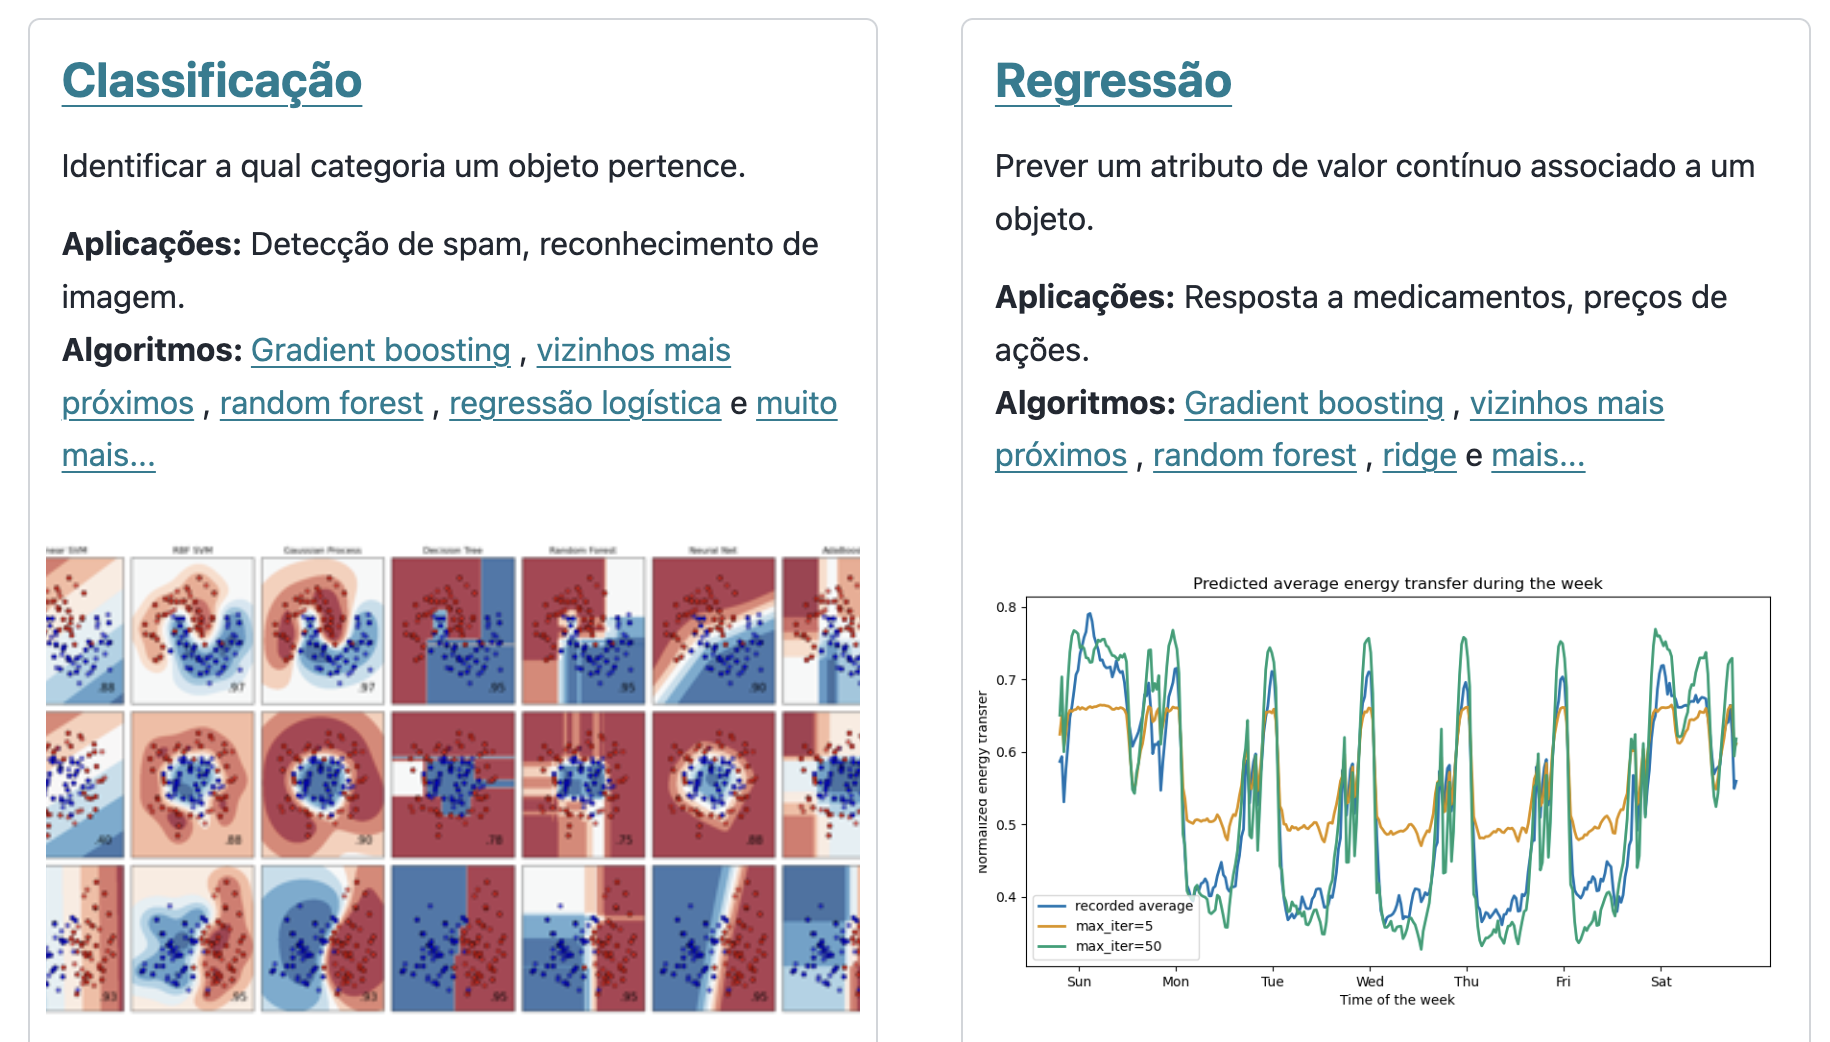

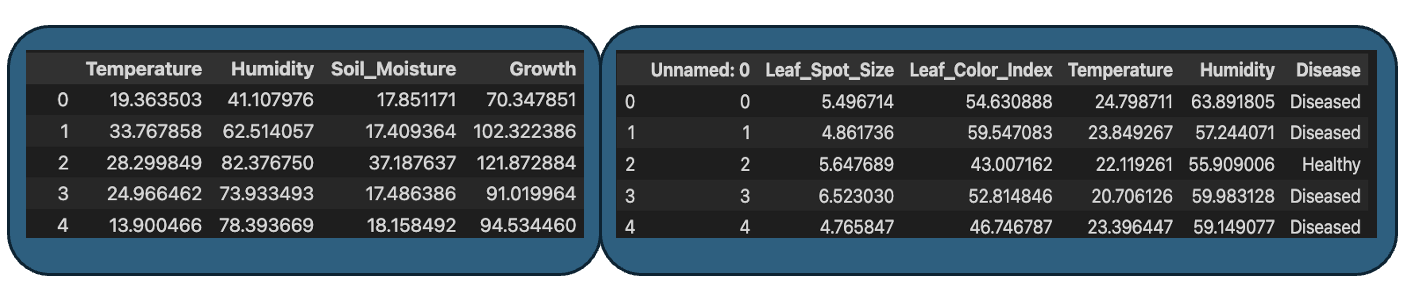

# Regressão

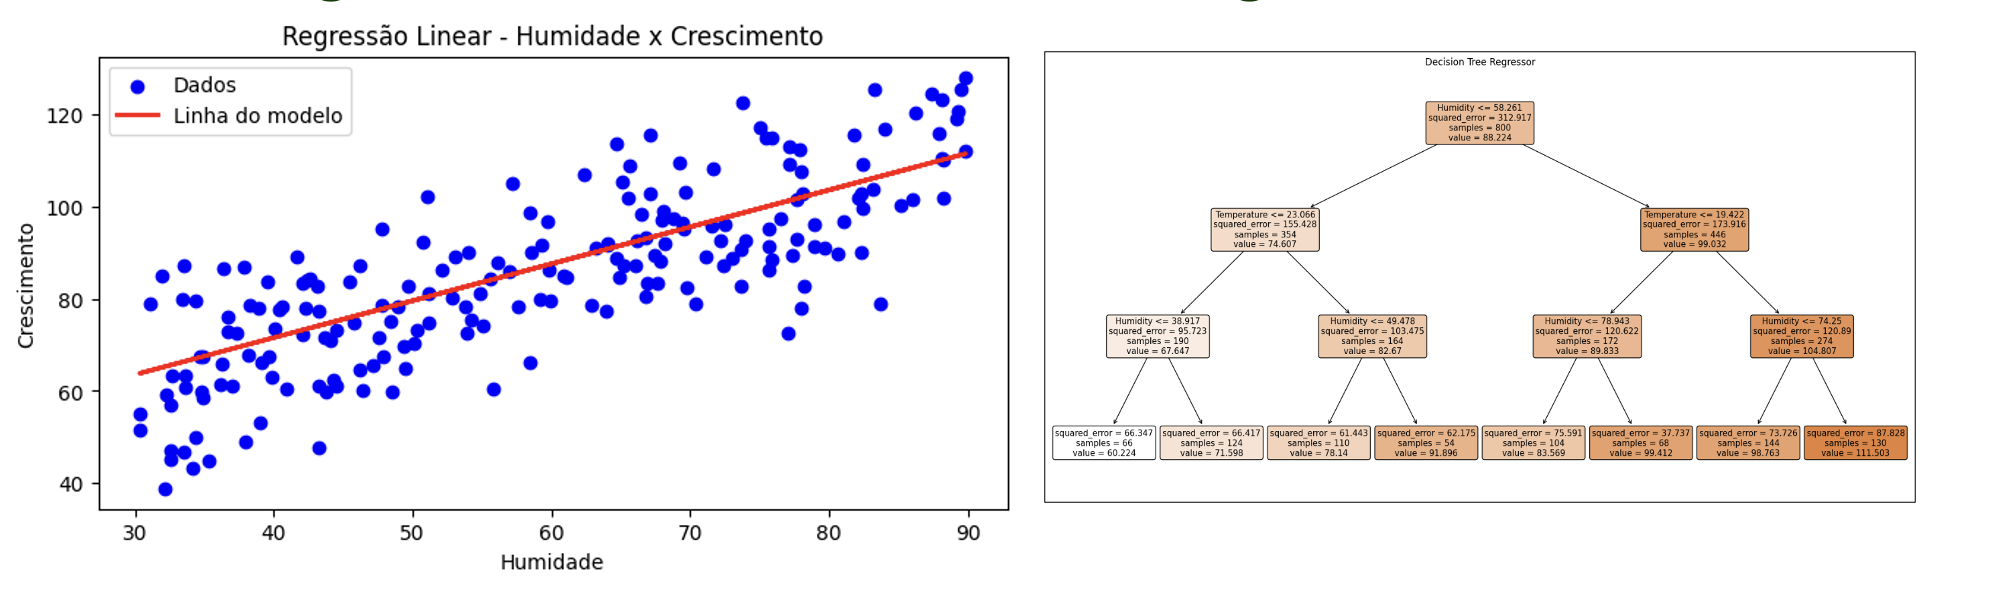

In [1]:
! pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 2.5 MB/s eta 0:00:002.5 MB/s eta 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression #Regressão Linear
from sklearn.tree import DecisionTreeRegressor, plot_tree #Árvores de Regressão
from sklearn.tree import export_text

from sklearn.metrics import mean_squared_error, r2_score #Métricas

##  Conjunto de Dados - Dataset

[Corn Crop Growth](https://www.kaggle.com/datasets/miguelh65/corn-crop-growth)

Este conjunto de dados contém informações sobre variáveis ambientais e de solo que influenciam o crescimento do cultivo do milho.


In [3]:
! pip install kaggle
! kaggle datasets download -d miguelh65/corn-crop-growth
! unzip corn-crop-growth.zip
! rm corn-crop-growth.zip

  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105785 sha256=050d04d6696949e685957279d540bfdbee9c0216f552b8157f17ad126e8b4ba9
  Stored in directory: /home/nata-brain/.cache/pip/wheels/2b/af/a9/70bffa2773af622d2ebea9c8d407720b86e67bd40c465bf837
Successfully built kaggle
Dataset URL: https://www.kaggle.com/datasets/miguelh65/corn-crop-growth
License(s): CC-BY-NC-SA-4.0
100%|███████████████████████████████████████| 36.1k/36.1k [00:00<00:00, 343kB/s]
100%|███████████████████████████████████████| 36.1k/36.1k [00:00<00:00, 342kB/s]
Archive:  corn-crop-growth.zip
  inflating: crop_growth_dataset.csv  


In [4]:
# Carregando o dataset
df = pd.read_csv('crop_growth_dataset.csv')

In [5]:
# Visualizando as informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    1000 non-null   float64
 1   Humidity       1000 non-null   float64
 2   Soil_Moisture  1000 non-null   float64
 3   Growth         1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [6]:
df

,Temperature,Humidity,Soil_Moisture,Growth
0,19.363503,41.107976,17.851171,70.347851
1,33.767858,62.514057,17.409364,102.322386
2,28.299849,82.376750,37.187637,121.872884
3,24.966462,73.933493,17.486386,91.019964
4,13.900466,78.393669,18.158492,94.534460
...,...,...,...,...
995,12.289552,69.417309,35.958873,96.403089
996,32.932839,87.396877,14.718196,115.374084
997,13.420466,34.137481,19.293636,61.014272
998,33.755934,33.423283,18.701366,79.991087


In [7]:
# Visualizando a distribuição dos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,1000.0,22.256414,7.303434,10.115801,15.899332,22.420184,28.607990,34.992942
Humidity,1000.0,60.421038,17.531394,30.193096,44.464456,61.124034,75.627903,89.964824
Soil_Moisture,1000.0,25.072172,8.720226,10.000349,17.840529,25.018418,32.773106,39.934626
Growth,1000.0,87.592048,17.971800,36.965558,74.650367,87.542517,101.076906,136.309728


**Gráfico Boxplot** - Exibe a distribuição dos dados e destaca os valores que estão fora do intervalo interquartil (*outliers*)

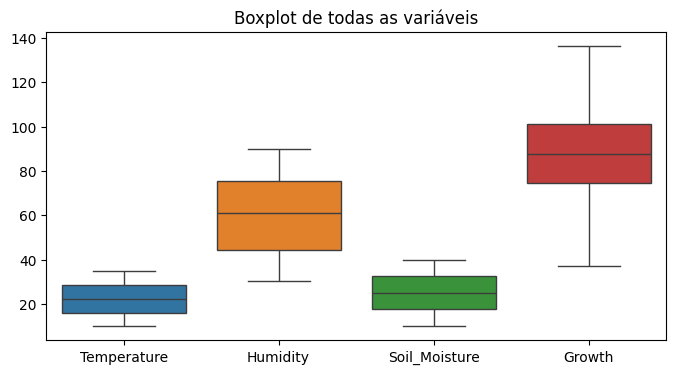

In [14]:
# Boxplot para identificar outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df)
plt.title('Boxplot de todas as variáveis')
plt.show()


## Regressão Linear

Selecionando a variável **umidade** (independente) e **crescimento** (dependente) para treinar o modelo

In [8]:
df.head(10)

,Temperature,Humidity,Soil_Moisture,Growth
0,19.363503,41.107976,17.851171,70.347851
1,33.767858,62.514057,17.409364,102.322386
2,28.299849,82.376750,37.187637,121.872884
3,24.966462,73.933493,17.486386,91.019964
4,13.900466,78.393669,18.158492,94.534460
5,13.899863,69.527002,32.781948,89.998664
6,11.452090,71.536594,23.492195,80.871495
7,31.654404,80.951739,33.301317,120.114276
8,25.027875,44.980081,11.960985,63.116831
9,27.701814,59.365498,24.627136,95.091408


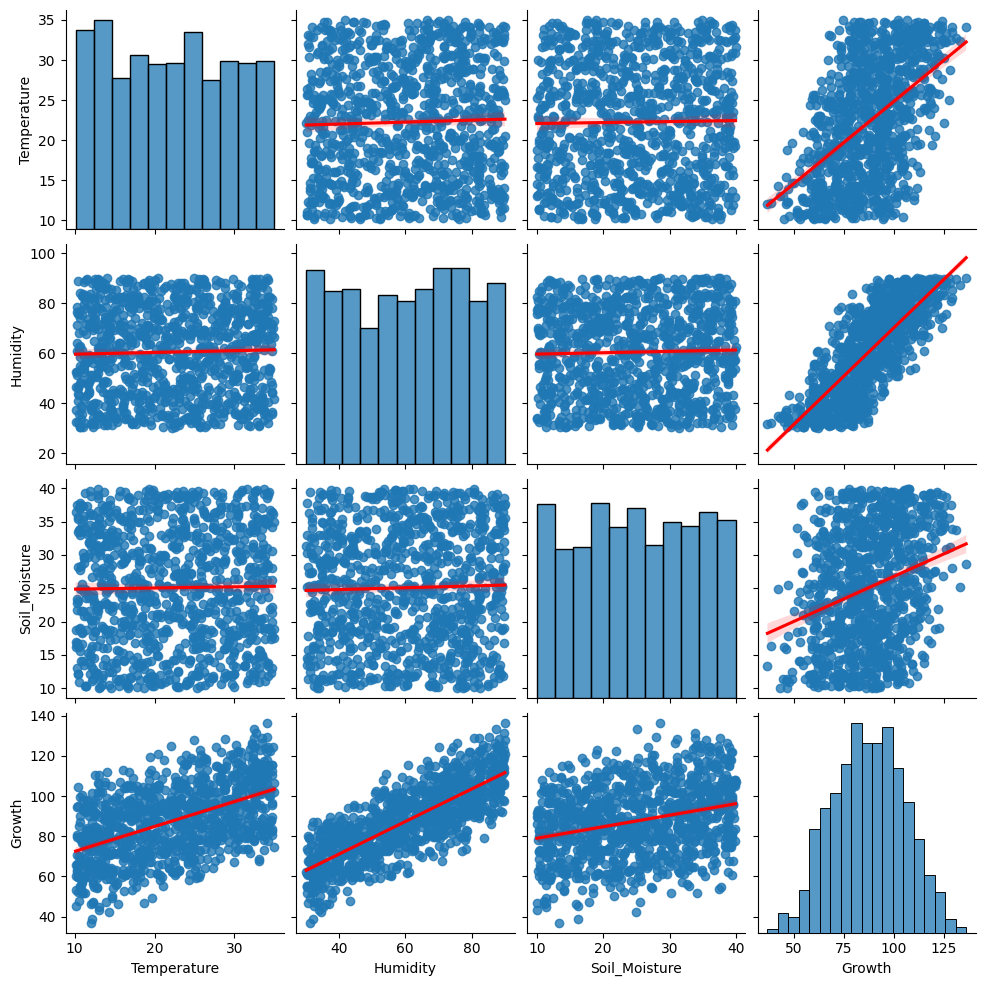

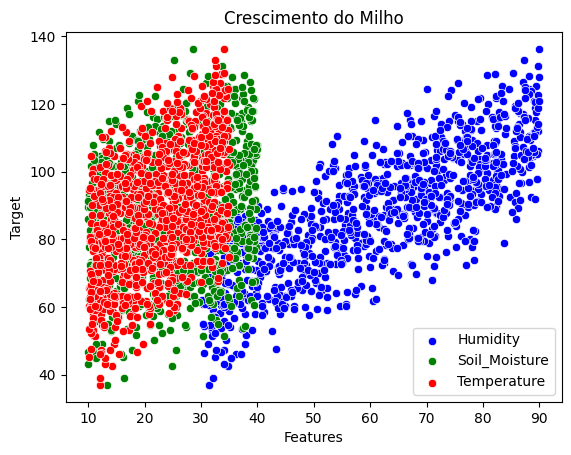

In [10]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})  # 'reg' para adicionar linha de regressão
plt.show()

# Outra visualização com scatterplot entre cada feature e o alvo
sns.scatterplot(x=df['Humidity'], y=df['Growth'], color='blue', label='Humidity')
sns.scatterplot(x=df['Soil_Moisture'], y=df['Growth'], color='green', label='Soil_Moisture')
sns.scatterplot(x=df['Temperature'], y=df['Growth'], color='red', label='Temperature')

plt.legend()
plt.title('Crescimento do Milho')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

In [15]:
# Definindo a variável independente (features) e a variável dependente (target/alvo)
X = df[['Humidity','Soil_Moisture','Temperature']]
y = df['Growth']

print(len(X))

print(len(y))

1000
1000


ValueError: x and y must be the same size

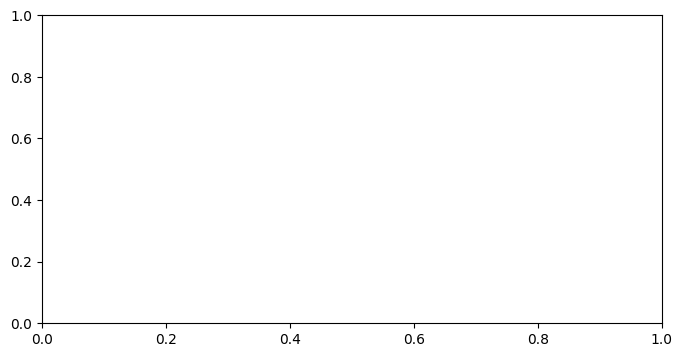

In [16]:
# Plotando a variáveis X e y
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue')
plt.xlabel('Umidade')
plt.ylabel('Crescimento')
plt.title('Variáveis - Umidade x Crescimento')
plt.show()

In [17]:
# Dividindo o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

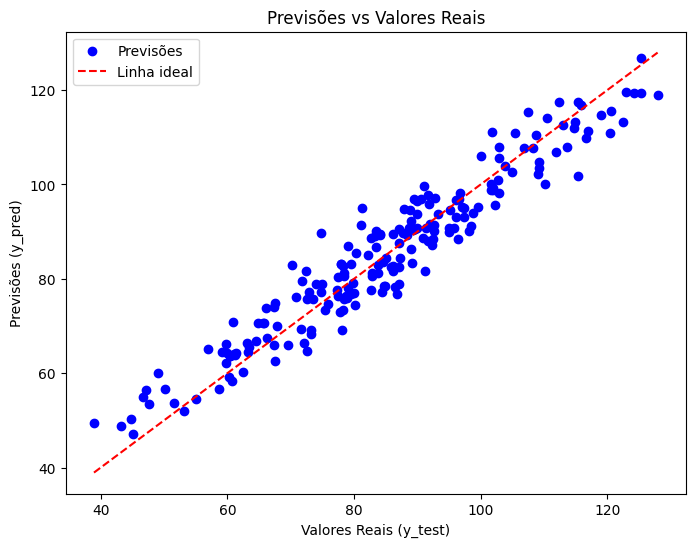

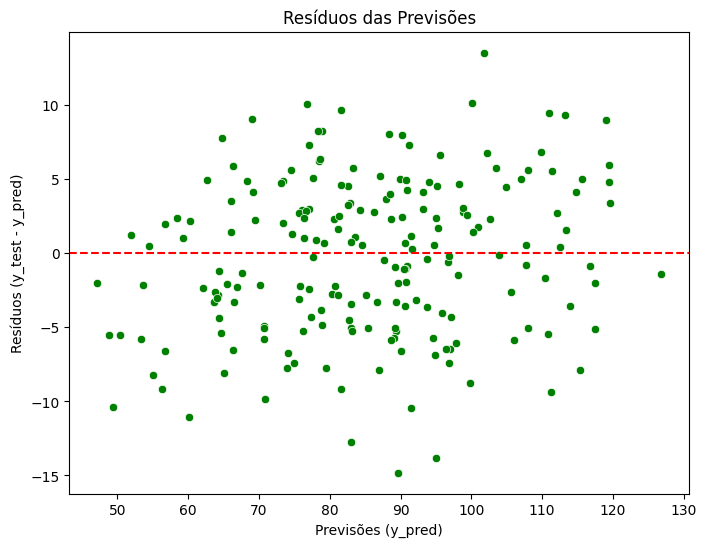

In [19]:
# Visualizando a relação entre y_test (valores reais) e y_pred (previsões do modelo)
plt.figure(figsize=(8, 6))

# Plotando o gráfico de dispersão
plt.scatter(y_test, y_pred, color='blue', label='Previsões')

# Plotando a linha y = x (representando a linha onde as previsões seriam perfeitas)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha ideal')

plt.title('Previsões vs Valores Reais')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Previsões (y_pred)')
plt.legend()
plt.show()

# Plotando os resíduos (diferença entre valores reais e previsões)
residuals = y_test - y_pred

# Gráfico de resíduos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos das Previsões')
plt.xlabel('Previsões (y_pred)')
plt.ylabel('Resíduos (y_test - y_pred)')
plt.show()


Métricas

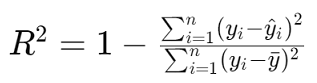

**R-squared (R²)** - Representa a proporção da variância dos dados dependentes que é explicada pelo modelo.

**R² = 1** - O modelo explica perfeitamente toda a variância dos dados.

**R² = 0** - O modelo não explica nenhuma variância além da média dos dados.

**R² < 0** - O modelo tem desempenho pior do que um modelo simples que prevê a média dos dados.

In [20]:
# Calculando métricas de avaliação
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.921521654079049


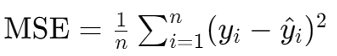

**Mean Squared Error (MSE)** - O erro quadrático médio (MSE) mede a média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais observados. O MSE é sensível a *outliers*.

In [21]:
# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 27.754533189209752


## Árvores de Regressão

In [22]:
# Definir as variáveis independentes (features) e a variável dependente (target/alvo)
X = df.drop(columns=['Growth'])
y = df['Growth']


In [23]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Criando o modelo Regressor de Árvore de Decisão
tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=3) #max_depth, limita a profundidade máxima que a árvore pode atingir

# Treinando o modelo
tree_regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = tree_regressor.predict(X_test)


Visualizando a árvore - Interpretabilidade

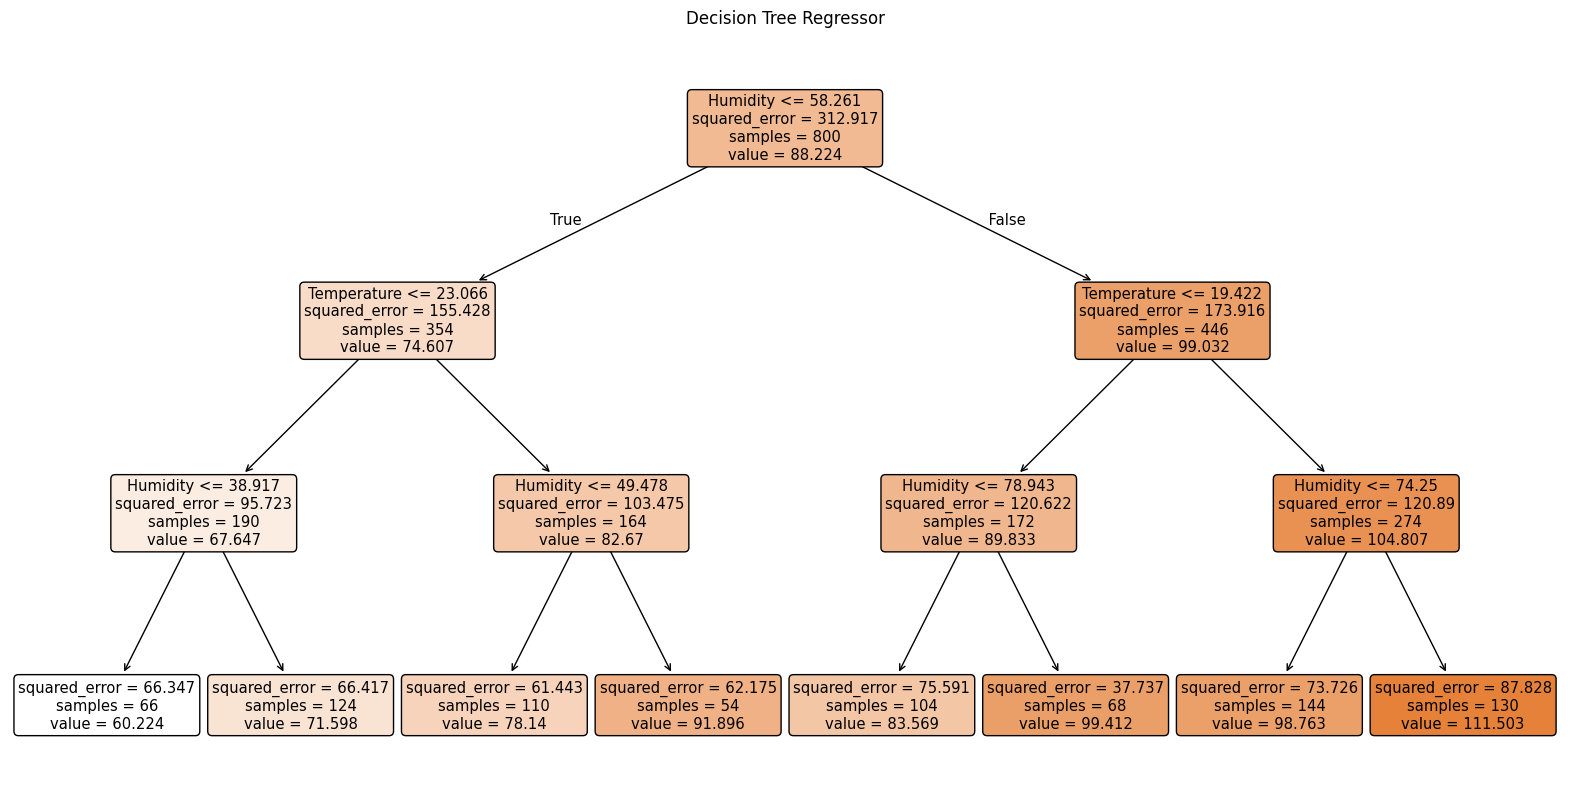

In [25]:
# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Regressor')
plt.show()


In [26]:
# Gerar a árvore de decisão para o formato de texto
tree_text = export_text(tree_regressor, feature_names=list(X.columns))
print(tree_text)


|--- Humidity <= 58.26
|   |--- Temperature <= 23.07
|   |   |--- Humidity <= 38.92
|   |   |   |--- value: [60.22]
|   |   |--- Humidity >  38.92
|   |   |   |--- value: [71.60]
|   |--- Temperature >  23.07
|   |   |--- Humidity <= 49.48
|   |   |   |--- value: [78.14]
|   |   |--- Humidity >  49.48
|   |   |   |--- value: [91.90]
|--- Humidity >  58.26
|   |--- Temperature <= 19.42
|   |   |--- Humidity <= 78.94
|   |   |   |--- value: [83.57]
|   |   |--- Humidity >  78.94
|   |   |   |--- value: [99.41]
|   |--- Temperature >  19.42
|   |   |--- Humidity <= 74.25
|   |   |   |--- value: [98.76]
|   |   |--- Humidity >  74.25
|   |   |   |--- value: [111.50]



Após treinar o modelo de árvore de regressão, é possível entender quais variáveis mais contribuíram para as previsões do modelo.

In [27]:
# Verificando a importância das variáveis
feature_importances = pd.Series(tree_regressor.feature_importances_, index=X.columns)

print("Importância das Variáveis:")
print(feature_importances.sort_values(ascending=False))


Importância das Variáveis:
Humidity         0.776777
Temperature      0.223223
Soil_Moisture    0.000000
dtype: float64


Métricas

In [28]:
# Calculando métricas de avaliação
r2 = r2_score(y_test, y_pred)
print(f"R-quadrado (R²): {r2}")


R-quadrado (R²): 0.7538341473708837


In [29]:
# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")


Erro Quadrático Médio (MSE): 87.05864333235083


# Classificação

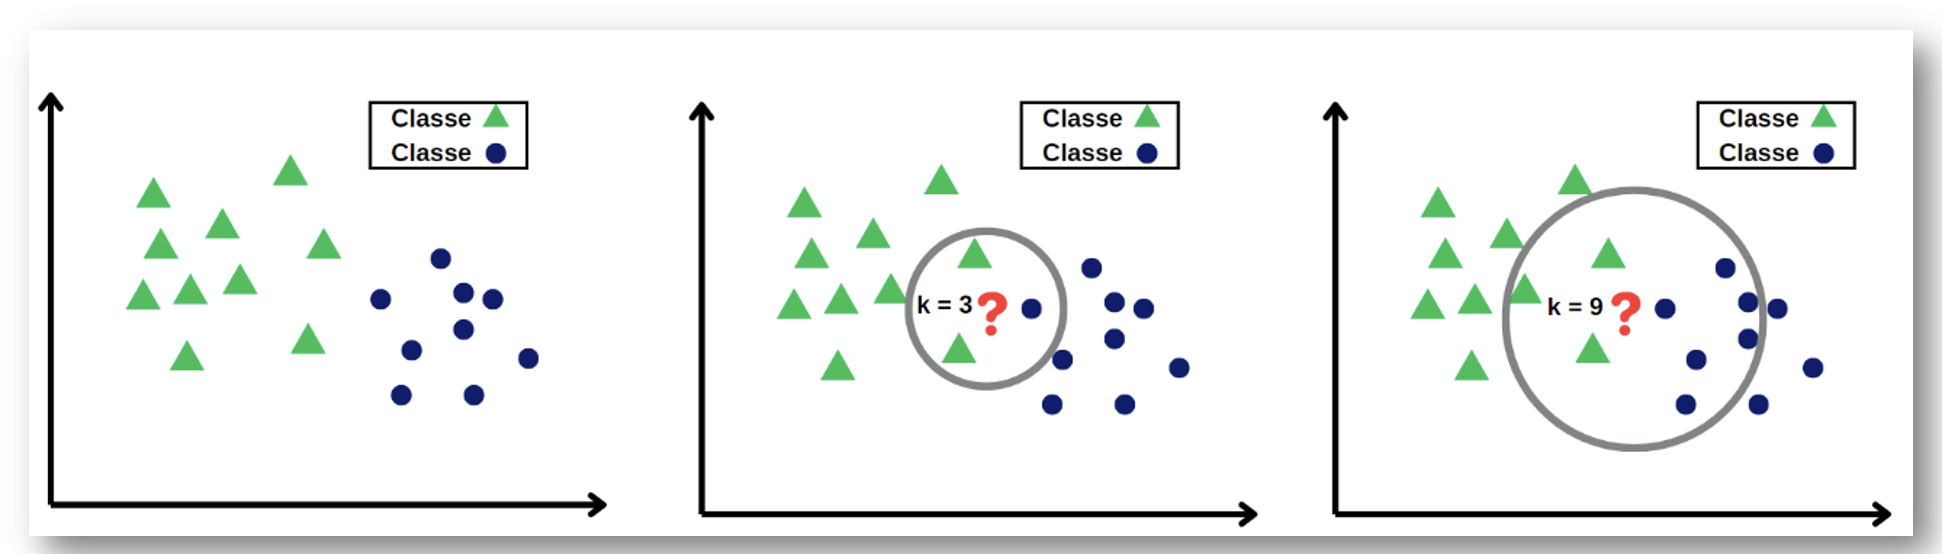

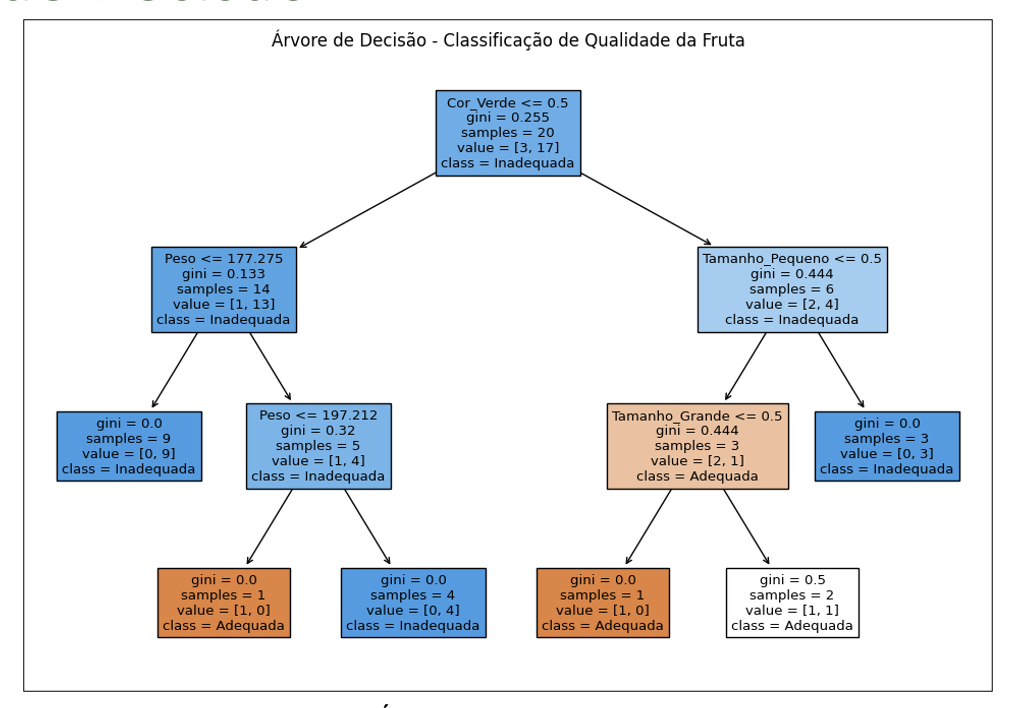

In [30]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Conjunto de Dados

[Tomato Plant Disease](https://www.kaggle.com/datasets/miguelh65/tomato-plant-disease-dataset) o conjunto de dados apresenta característica das folhas de tomate o do ambiente que influenciam a saúde da planta. Classes: Diseased - Doente e Healthy - Saudável

In [31]:
! kaggle datasets download -d miguelh65/tomato-plant-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/miguelh65/tomato-plant-disease-dataset
License(s): CC-BY-NC-SA-4.0
  0%|                                               | 0.00/20.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 20.0k/20.0k [00:00<00:00, 1.64MB/s]


In [32]:
! unzip tomato-plant-disease-dataset.zip
! rm tomato-plant-disease-dataset.zip

Archive:  tomato-plant-disease-dataset.zip
  inflating: tomato_disease.csv      


In [33]:
# Carregar os dados
data = pd.read_csv('tomato_disease.csv')

data.info() #Informações gerais sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        500 non-null    int64  
 1   Leaf_Spot_Size    500 non-null    float64
 2   Leaf_Color_Index  500 non-null    float64
 3   Temperature       500 non-null    float64
 4   Humidity          500 non-null    float64
 5   Disease           500 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 23.6+ KB


In [34]:
data.head(10)

,Unnamed: 0,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,0,5.496714,54.630888,24.798711,63.891805,Diseased
1,1,4.861736,59.547083,23.849267,57.244071,Diseased
2,2,5.647689,43.007162,22.119261,55.909006,Healthy
3,3,6.523030,52.814846,20.706126,59.983128,Diseased
4,4,4.765847,46.746787,23.396447,59.149077,Diseased
5,5,4.765863,47.564373,22.786971,57.733860,Diseased
6,6,6.579213,47.038030,23.790386,63.481937,Diseased
7,7,5.767435,45.680046,23.270344,64.776526,Diseased
8,8,4.530526,50.242608,24.099105,60.442034,Diseased
9,9,5.542560,45.845249,20.929530,67.387650,Diseased


In [35]:
data = data.drop(columns=['Unnamed: 0'])

In [36]:
# Visualizando as classes
data.Disease.value_counts()

Diseased    436
Healthy      64
Name: Disease, dtype: int64

In [38]:
# Visualizando a distribuição dos dados
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Leaf_Spot_Size,500.0,5.006838,0.981253,1.758733,4.299693,5.012797,5.636783,8.852731
Leaf_Color_Index,500.0,50.159131,4.889986,36.515567,47.023541,50.142658,53.256211,63.161910
Temperature,500.0,22.216969,2.020493,16.207489,20.795141,22.239612,23.509477,27.203366
Humidity,500.0,60.165940,4.920331,45.298057,56.940319,59.955433,63.498847,75.965538


In [39]:
# Preparação dos dados
X = data.drop('Disease', axis=1)
y = data['Disease']

O LabelEncoder é usado para converter classes categóricas em valores numéricos. Neste caso, Diseased ou Healthy em valores numéricos 0 ou 1.

In [40]:
# Codificar a variável alvo
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## KNN

In [59]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

A **padronização** é aplicada para garantir que todas as features tenham a mesma escala, com Média (μ) 0 e Desvio Padrão (σ) 1, isso ajuda a melhorar o desempenho e a estabilidade des algoritmos como o KNN, que são sensíveis às diferentes escalas das features.

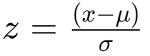

In [60]:
# Padronizar as características (features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Treinar o modelo KNN
k = 3 #Número de vizinhos próximos

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

A acucária do classificador é:  0.9533333333333334


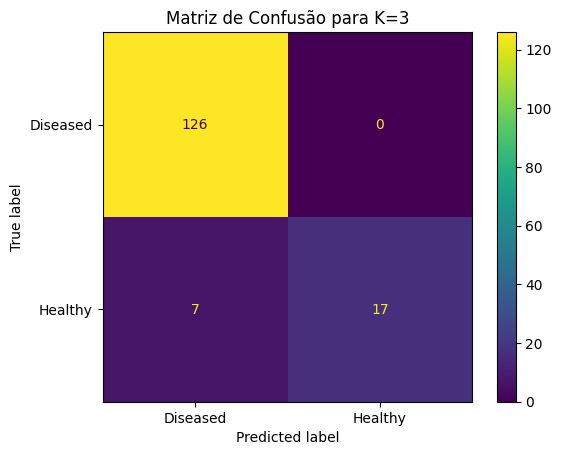

In [62]:
#Exibir a métrica acurácia
print("A acucária do classificador é: ", accuracy_score(y_test, y_pred))

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_encoder.classes_)
disp.plot()
plt.title(f'Matriz de Confusão para K={k}')
plt.show()


## Árvores de Decisão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Leaf_Spot_Size    500 non-null    float64
 1   Leaf_Color_Index  500 non-null    float64
 2   Temperature       500 non-null    float64
 3   Humidity          500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [63]:
# Preparação dos dados
X = data.drop('Disease', axis=1)
y = data['Disease']

# Codificar a variável alvo
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [64]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
# Treinar o modelo de Árvore de Decisão
tree = DecisionTreeClassifier(random_state=42, max_depth=3)
tree.fit(X_train, y_train)

# Fazer previsões
y_pred = tree.predict(X_test)

A acucária do classificador é:  0.92


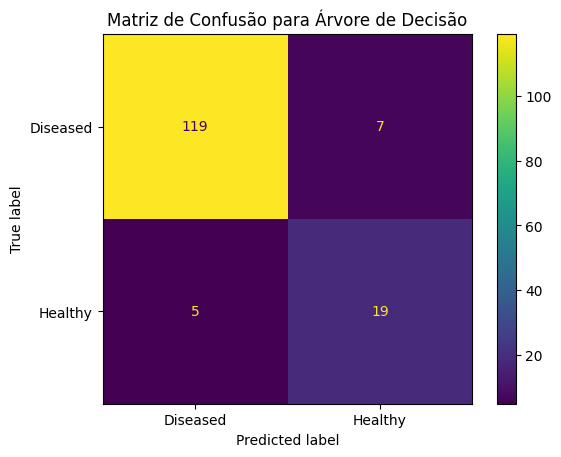

In [66]:
#Exibir a métrica acurácia
print("A acucária do classificador é: ", accuracy_score(y_test, y_pred))

# Exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.title('Matriz de Confusão para Árvore de Decisão')
plt.show()


In [67]:
# Verificando a importância das características / variáveis
feature_importances = pd.Series(tree.feature_importances_, index=X.columns)

print("Importância das Variáveis:")
print(feature_importances.sort_values(ascending=False))

Importância das Variáveis:
Temperature         0.432969
Humidity            0.339597
Leaf_Spot_Size      0.227434
Leaf_Color_Index    0.000000
dtype: float64


O **índice de Gini** é uma medida de impureza usada em árvores de decisão para avaliar a qualidade de uma divisão (split)

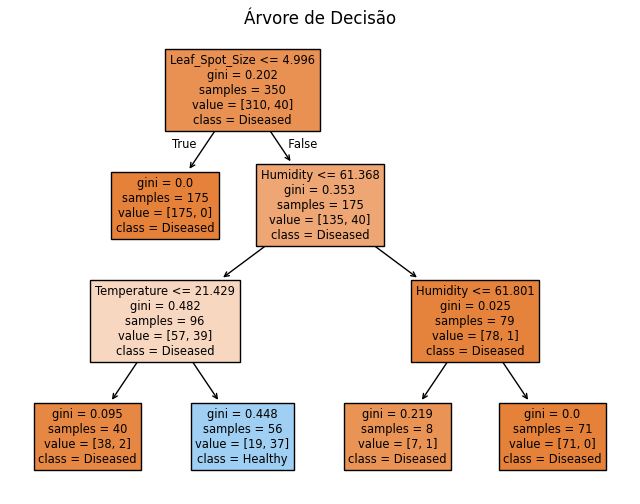

In [68]:
# Visualizar a árvore de decisão em forma de gráfico
plt.figure(figsize=(8,6))
plot_tree(tree, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title('Árvore de Decisão')
plt.show()

In [70]:
# Visualizar a árvore de decisão em forma de texto
tree_rules = export_text(tree, feature_names=list(X.columns))
print("Regras da Árvore de Decisão:")
print(tree_rules)

Regras da Árvore de Decisão:
|--- Leaf_Spot_Size <= 5.00
|   |--- class: 0
|--- Leaf_Spot_Size >  5.00
|   |--- Humidity <= 61.37
|   |   |--- Temperature <= 21.43
|   |   |   |--- class: 0
|   |   |--- Temperature >  21.43
|   |   |   |--- class: 1
|   |--- Humidity >  61.37
|   |   |--- Humidity <= 61.80
|   |   |   |--- class: 0
|   |   |--- Humidity >  61.80
|   |   |   |--- class: 0

